### Importing all the necessary dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

### Looking at the structure of the Dataset

In [3]:
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Looking at the statistical information and total rows and columns of data

In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Ckecking for any missing values in the dataset

In [6]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Grouping customers based on factors Annual Income and Spending Score

In [7]:
X = customer_data.iloc[:, [3, 4]].to_numpy()

### We will now determine the optimal number of clusters by analyzing the elbow point from Within-Cluster Sum of Squares

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [9]:
wcss

[269981.28,
 183653.32894736837,
 106348.37306211118,
 73880.64496247197,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518779,
 24766.47160979344,
 23103.122085983916]

### Plotting WCSS to get the elbow point for number of clusters

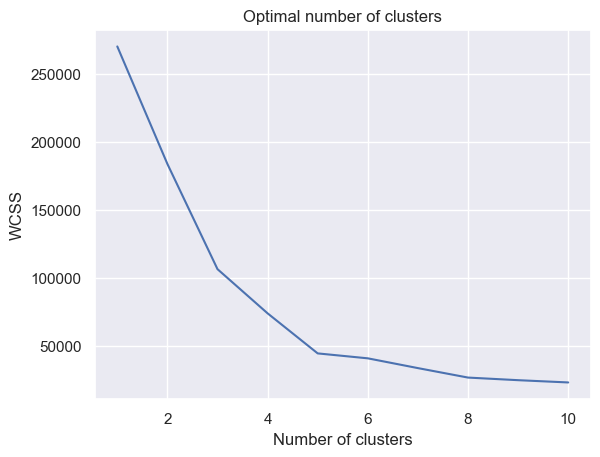

In [10]:
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Optimal number of clusters')
plt.xlabel('Number of clusters')    
plt.ylabel('WCSS')
plt.show()


### Number of optimum clusters found is 5

### We will now train the K-Means Model

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y_kmeans = kmeans.fit_predict(X)

print(Y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


### We have now identified 5 clusters among our data points

### Now, we will visualize how our data points are distributed around the identified clusters.

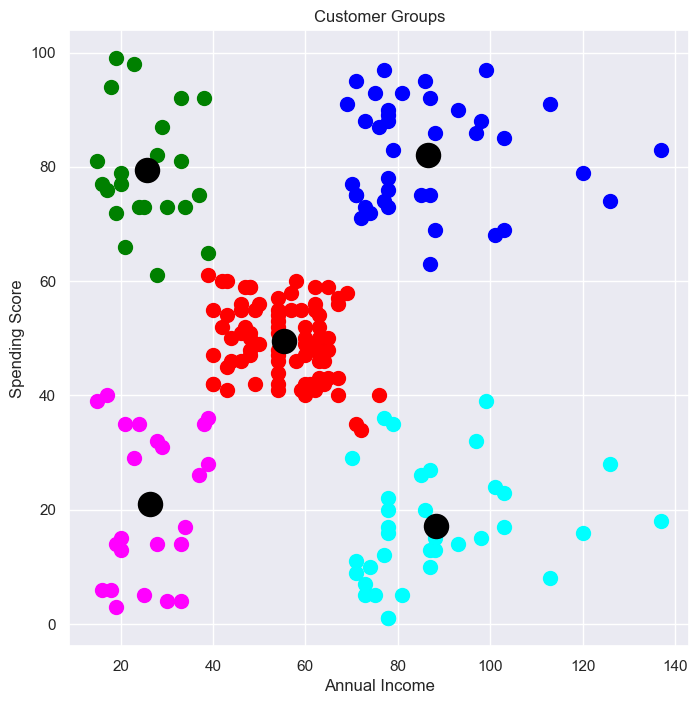

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[Y_kmeans == 3, 0], X[Y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[Y_kmeans == 4, 0], X[Y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()